# Regression & Bayesian Analysis with Food Deserts
## Part 1: Exploratory Analysis and Getting Data into Shape

______
## Key Terms
 * ### Food desert: 
     - A census tract that meets both low-income and low-access criteria including: 1. poverty rate is greater than or equal to 20 percent OR median family income does not exceed 80 percent statewide (rural/urban) or metro-area (urban) median family income; 2. at least 500 people or 33 percent of the population located more than 1 mile (urban) or 10 miles (rural) from the nearest supermarket or large grocery store.  
 * ### Low-income area
     - A tract in which the poverty rate is greater than or equal to 20 percent; or in which median family income does not exceed 80 percent of the statewide or metro-area median family income
 * ### Low-income household: 
     - A household with income less than the Federal poverty level : 17,050 dollars for a family of four in 2000.
 * ### Rural area: 
      - Includes areas defined by Rural-Urban Commuting Area codes as large rural, small rural, and isolated rural areas.
      
      
http://www.ers.usda.gov/media/883903/err140.pdf

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

First lets read in our data, which can be downloaded from http://www.ers.usda.gov/data-products/food-access-research-atlas/download-the-data.aspx under the Current Version heading. 

In [15]:
df=pd.read_excel('/Users/workspace/PycharmProjects/desert/desert_data//food_desert.xlsx',sheetname=2)
df.columns.tolist()

[u'CensusTract',
 u'State',
 u'County',
 u'LILATracts_1And10',
 u'LILATracts_halfAnd10',
 u'LILATracts_1And20',
 u'LILATracts_Vehicle',
 u'Urban',
 u'Rural',
 u'LA1and10',
 u'LAhalfand10',
 u'LA1and20',
 u'LATracts_half',
 u'LATracts1',
 u'LATracts10',
 u'LATracts20',
 u'HUNVFlag',
 u'GroupQuartersFlag',
 u'OHU2010',
 u'NUMGQTRS',
 u'PCTGQTRS',
 u'LowIncomeTracts',
 u'POP2010',
 u'UATYP10',
 u'lapophalf',
 u'lapophalfshare',
 u'lalowihalf',
 u'lalowihalfshare',
 u'lakidshalf',
 u'lakidshalfshare',
 u'laseniorshalf',
 u'laseniorshalfshare',
 u'lahunvhalf',
 u'lahunvhalfshare',
 u'lapop1',
 u'lapop1share',
 u'lalowi1',
 u'lalowi1share',
 u'lakids1',
 u'lakids1share',
 u'laseniors1',
 u'laseniors1share',
 u'lahunv1',
 u'lahunv1share',
 u'lapop10',
 u'lapop10share',
 u'lalowi10',
 u'lalowi10share',
 u'lakids10',
 u'lakids10share',
 u'laseniors10',
 u'laseniors10share',
 u'lahunv10',
 u'lahunv10share',
 u'lapop20',
 u'lapop20share',
 u'lalowi20',
 u'lalowi20share',
 u'lakids20',
 u'lakids20

For reference, lets also read in the column meanings which are contained in the excel file. 

In [16]:
#desert data variables 
desert_vars=pd.read_excel('/Users/workspace/PycharmProjects/desert/desert_data//food_desert.xlsx',sheetname=1)
desert_vars.head(3)

,Field,LongName
0,CensusTract,Census tract
1,County,County
2,GroupQuartersFlag,"Group quarters, tract with high share"


For convience we can make create a dictionary from our desert_vars dataframe that provides us with a means to quickly look up column name meanings.


In [17]:
# provides us with a dictionary to quickly look up column name meanings
col_dict = desert_vars.set_index('Field').to_dict()['LongName']
col_dict

{u'CensusTract': u'Census tract',
 u'County': u'County',
 u'GroupQuartersFlag': u'Group quarters, tract with high share',
 u'HUNVFlag': u'Vehicle access, tract with low rate',
 u'LA1and10': u'Low access tract at 1 mile for urban areas or 10 miles for rural areas',
 u'LA1and20': u'Low access tract at 1 mile for urban areas or 20 miles for rural areas',
 u'LATracts1': u'Low access tract at 1 mile',
 u'LATracts10': u'Low access tract at 10 miles',
 u'LATracts20': u'Low access tract at 20 miles',
 u'LATracts_half': u'Low access tract at 1/2 mile',
 u'LAhalfand10': u'Low access tract at 1/2 mile for urban areas or 10 miles for rural areas',
 u'LILATracts_1And10': u'Low income and low access measured at 1 and 10 miles',
 u'LILATracts_1And20': u'Low income and low access measured at 1 and 20 miles',
 u'LILATracts_Vehicle': u'Low income and low access using vehicle access',
 u'LILATracts_halfAnd10': u'Low income and low access measured at 1/2 and 10 miles',
 u'LowIncomeTracts': u'Low income tr

______
Now let's slim our dataset to include only counties located in California. 

In [18]:
df = df[df['State'] == 'CA']
df

,CensusTract,State,County,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,Urban,Rural,LA1and10,...,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lahunv20,lahunv20share
3558,6001400100,CA,Alameda,0,0,0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3559,6001400200,CA,Alameda,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3560,6001400300,CA,Alameda,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3561,6001400400,CA,Alameda,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3562,6001400500,CA,Alameda,0,1,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3563,6001400600,CA,Alameda,0,1,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3564,6001400700,CA,Alameda,0,1,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3565,6001400800,CA,Alameda,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3566,6001400900,CA,Alameda,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3567,6001401000,CA,Alameda,0,1,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


To get a sense for the data, lets make a correlation matrix using seaborn's heatmap plot.  This will show the correlations that exist between our features. 

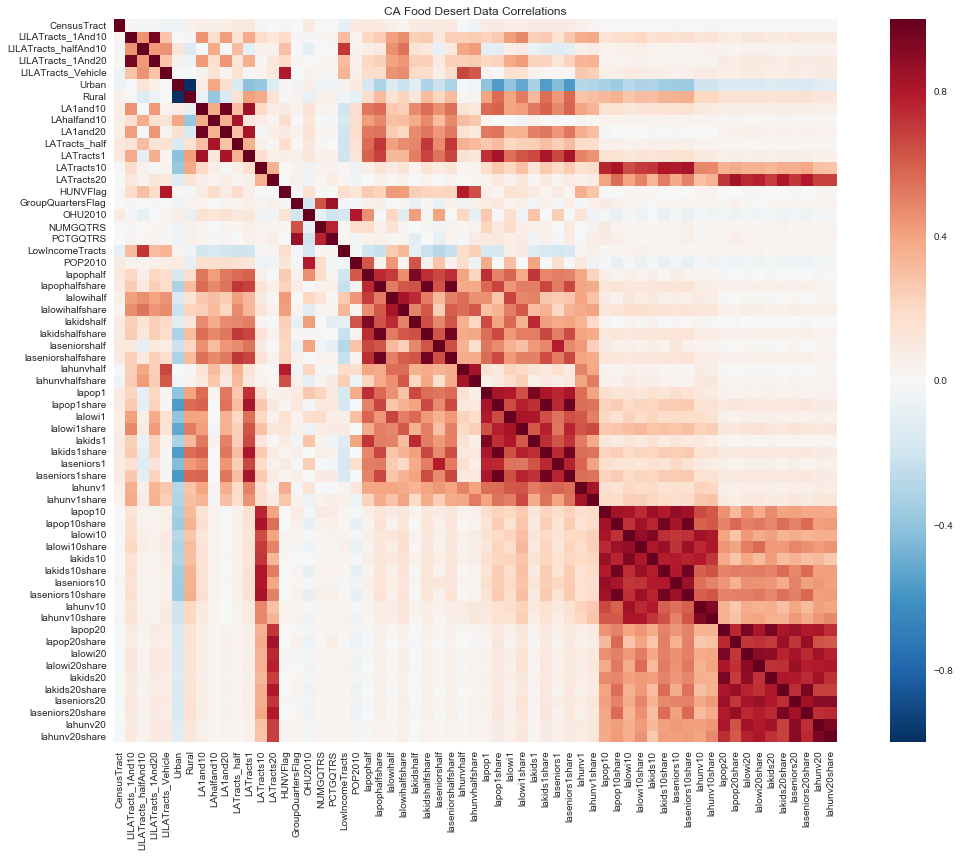

In [19]:
# Load the datset correlations
corrmat = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Draw the heatmap using seaborn, and add a title to the plot
sns.heatmap(corrmat, vmax=.8, square=True)
ax.set_title('CA Food Desert Data Correlations')
f.tight_layout()

Just from this few lines of code we recieve a wealth of insight about how our features correlate with one another. 

________
### Preparing our Data

Now for the cleaning! First lets assess the dtypes of our columns to insure they are in the correct format. This can be done using pandas info method:

In [20]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8044 entries, 3558 to 11601
Data columns (total 64 columns):
CensusTract             8044 non-null int64
State                   8044 non-null object
County                  8044 non-null object
LILATracts_1And10       8044 non-null int64
LILATracts_halfAnd10    8044 non-null int64
LILATracts_1And20       8044 non-null int64
LILATracts_Vehicle      8044 non-null int64
Urban                   8044 non-null int64
Rural                   8044 non-null int64
LA1and10                8044 non-null int64
LAhalfand10             8044 non-null int64
LA1and20                8044 non-null int64
LATracts_half           8044 non-null int64
LATracts1               8044 non-null int64
LATracts10              8044 non-null int64
LATracts20              8044 non-null int64
HUNVFlag                8044 non-null int64
GroupQuartersFlag       8044 non-null int64
OHU2010                 8044 non-null int64
NUMGQTRS                8024 non-null float64
PCTGQ

We can see all values are either integers or floats, except for 3 columns:
* UATYP10  
* State  
* County  
  
State and County values are straightforward, and we can assume that we should change these values to strings, but UATYP10 is not as clear. We should use our column dictionary to remind us of what this feature represents.


In [21]:
col_dict['UATYP10']

u'Census urban area'


Now that we know what the variable represents, we can research the definitions by visiting the documentation at http://www.ers.usda.gov/data-products/food-access-research-atlas/about-the-atlas.aspx and census definitions at https://www.census.gov/geo/reference/urban-rural.html 

First lets look at  https://www.census.gov/geo/reference/urban-rural.html 
____
#### Urban areas, Urban Cluster, and Rural classification
The Census Bureau’s urban-rural classification is fundamentally a delineation of geographical areas, identifying both individual urban areas and the rural areas of the nation.  The Census Bureau’s urban areas represent densely developed territory, and encompass residential, commercial, and other non-residential urban land uses.  The Census Bureau delineates urban areas after each decennial census by applying specified criteria to decennial census and other data.

The Census Bureau identifies two types of urban areas:

* Urbanized Areas (UAs) of 50,000 or more people;
* Urban Clusters (UCs) of at least 2,500 and less than 50,000 people.
* “Rural” encompasses all population, housing, and territory not included within an urban area.

____

Ok, let's see what values this columns holds, and confirm these allign with our research. 

In [22]:
df['UATYP10'].unique() # provides all unique values for this column

array([u'U', u'R', u'C'], dtype=object)

We see this column holds the following labels:
* U - Denotes urban areas
* R - Denotes rural areas
* C - Is not as clear as the previous labels, and will need further exploration to determine if this denotes urban clusters, or something else. 

  
Lets see if our assumption is correct that C == urban cluster. To assess our assumptions lets look at the counties with a 'POP2010' value of 'C' to make sure their 2010 populations are at least 2500 and less than 50000. Lets take a look at the first 10 values.

In [23]:
df[df['UATYP10'] == 'C'][['County', 'POP2010']][:10]

,County,POP2010
3953,Butte,5739
3954,Butte,2852
3956,Butte,5640
3957,Butte,3373
3958,Butte,5184
3959,Butte,4599
3965,Butte,3455
3966,Butte,5478
3967,Butte,4275
3968,Butte,3060


So far so good! But just to be safe lets mask our dataframe so that the return value are rows that don't meet the conditions we listed above.  If all is correct, the return value should be an empty dataframe. If the return value is not an empty dataframe, we need to research further to determine whether the returned rows are faulty data values, or our initial assumption about the meaning of C was incorrect. 

In [24]:
urban_clusters = df[df['UATYP10'] == 'C']
urban_clusters[(urban_clusters['POP2010'] < 2500) |  (urban_clusters['POP2010'] > 50000)]['POP2010']

4204     1881
4210     2469
4422     2047
4469     1479
4520     2457
4645     2139
4696     2384
4721     1939
7355     1868
7356     2287
7967     1719
7971     2129
8371     2377
8453     2027
8468     1958
8800     2059
9111     1257
9175     2390
9179     1593
9180     1271
9181     1239
9182      995
10180    2249
Name: POP2010, dtype: int64

Hmm, looks like we have some counties labeled as C that do not meet the definition provided by the Census Bureau. Lets take a closer look at the documentation which can be found at http://www.ers.usda.gov/data-products/food-access-research-atlas/about-the-atlas.aspx

The documentation confirms our assumption that we were right thinking C denotes clusters, which means we must decide what to do with these illegitmate rows. In this case, it makes the most sense to drop these illegetimate rows.
... 

ASK NIKHIL - ok to exclude these?
---
http://www.ofm.wa.gov/pop/geographic/tiger10/metadata/urban10.html - shows C stands for urban cluster

Lets make our object columns into strings. 

In [63]:
# df['State']=df['State'].apply(str) 
# df['County']=df['County'].apply(str) 
# df['UATYP10']=df['UATYP10'].apply(str) 
# df['CensusTract']=df['CensusTract'].apply(str) 

# #df.info(verbose=True)
# #df['state']=df['State']
# test = df['State'].astype(str)
# type(test.iloc[0])
# #df.loc['State', 1]#,'State']
# df['state'] = df.iloc[:,1].astype(str)#) 'State']
#df=df.drop('state', axis=1)

We now need to check for null values

In [66]:
df.isnull().values.any()

True

In [83]:
df[pd.isnull(df.values)]

,CensusTract,State,County,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,Urban,Rural,LA1and10,...,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lahunv20,lahunv20share
4201,6013990000,CA,Contra Costa,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4201,6013990000,CA,Contra Costa,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4251,6017990000,CA,El Dorado,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4251,6017990000,CA,El Dorado,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5779,6037320000,CA,Los Angeles,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5779,6037320000,CA,Los Angeles,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7043,6037980001,CA,Los Angeles,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7043,6037980001,CA,Los Angeles,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7044,6037980002,CA,Los Angeles,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7044,6037980002,CA,Los Angeles,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
np.sum(df.isnull())

CensusTract              0
State                    0
County                   0
LILATracts_1And10        0
LILATracts_halfAnd10     0
LILATracts_1And20        0
LILATracts_Vehicle       0
Urban                    0
Rural                    0
LA1and10                 0
LAhalfand10              0
LA1and20                 0
LATracts_half            0
LATracts1                0
LATracts10               0
LATracts20               0
HUNVFlag                 0
GroupQuartersFlag        0
OHU2010                  0
NUMGQTRS                20
PCTGQTRS                20
LowIncomeTracts          0
POP2010                  0
UATYP10                  0
lapophalf                0
lapophalfshare           0
lalowihalf               0
lalowihalfshare          0
lakidshalf               0
lakidshalfshare          0
                        ..
lapop1                   0
lapop1share              0
lalowi1                  0
lalowi1share             0
lakids1                  0
lakids1share             0
l

In [79]:
mask=df.isnull() == True
#df.where(pd.isnull(df))

,CensusTract,State,County,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,Urban,Rural,LA1and10,...,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lahunv20,lahunv20share
3558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
lila1_10 = df.copy(deep=False)
lila1_10=lila1_10.drop(['LILATracts_halfAnd10','LILATracts_1And20','LILATracts_Vehicle','LAhalfand10','LA1and20','LATracts_half','LATracts20'],axis=1)
lila1_10

,CensusTract,State,County,LILATracts_1And10,Urban,Rural,LA1and10,LATracts1,LATracts10,HUNVFlag,...,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lahunv20,lahunv20share
0,1001020100,AL,Autauga,0,1,0,1,1,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1001020200,AL,Autauga,0,1,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1001020300,AL,Autauga,0,1,0,1,1,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1001020400,AL,Autauga,0,1,0,1,1,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1001020500,AL,Autauga,0,1,0,1,1,0,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,1001020600,AL,Autauga,0,1,0,1,1,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,1001020700,AL,Autauga,1,1,0,1,1,0,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,1001020801,AL,Autauga,0,0,1,0,1,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,1001020802,AL,Autauga,0,0,1,0,1,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,1001020900,AL,Autauga,0,0,1,1,1,1,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
hospital = pd.read_csv('/Users/workspace/PycharmProjects/desert/desert_data/Readmissions_and_Deaths_-_Hospital.csv')
hospital.columns

Index([u'Provider ID', u'Hospital Name', u'Address', u'City', u'State',
       u'ZIP Code', u'County Name', u'Phone Number', u'Measure Name',
       u'Measure ID', u'Compared to National', u'Denominator', u'Score',
       u'Lower Estimate', u'Higher Estimate', u'Footnote',
       u'Measure Start Date', u'Measure End Date', u'Location'],
      dtype='object')

In [7]:
hospital.

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date,Location
0,050054,SAN GORGONIO MEMORIAL HOSPITAL,600 NORTH HIGHLAND SPRINGS AVENUE,BANNING,CA,92220,RIVERSIDE,9518451121,Acute Myocardial Infarction (AMI) 30-Day Morta...,MORT_30_AMI,No different than the National Rate,91,14.6,11.5,18.5,NaN,07/01/2011,06/30/2014,"600 NORTH HIGHLAND SPRINGS AVENUE\nBANNING, CA..."
1,050054,SAN GORGONIO MEMORIAL HOSPITAL,600 NORTH HIGHLAND SPRINGS AVENUE,BANNING,CA,92220,RIVERSIDE,9518451121,Death rate for CABG,MORT_30_CABG,Not Available,Not Available,Not Available,Not Available,Not Available,5 - Results are not available for this reporti...,07/01/2011,06/30/2014,"600 NORTH HIGHLAND SPRINGS AVENUE\nBANNING, CA..."
2,050054,SAN GORGONIO MEMORIAL HOSPITAL,600 NORTH HIGHLAND SPRINGS AVENUE,BANNING,CA,92220,RIVERSIDE,9518451121,Death rate for chronic obstructive pulmonary d...,MORT_30_COPD,No different than the National Rate,82,8.4,5.7,11.7,NaN,07/01/2011,06/30/2014,"600 NORTH HIGHLAND SPRINGS AVENUE\nBANNING, CA..."
3,050054,SAN GORGONIO MEMORIAL HOSPITAL,600 NORTH HIGHLAND SPRINGS AVENUE,BANNING,CA,92220,RIVERSIDE,9518451121,Heart failure (HF) 30-Day Mortality Rate,MORT_30_HF,No different than the National Rate,98,11.5,8.7,15.4,NaN,07/01/2011,06/30/2014,"600 NORTH HIGHLAND SPRINGS AVENUE\nBANNING, CA..."
4,050054,SAN GORGONIO MEMORIAL HOSPITAL,600 NORTH HIGHLAND SPRINGS AVENUE,BANNING,CA,92220,RIVERSIDE,9518451121,Pneumonia (PN) 30-Day Mortality Rate,MORT_30_PN,Worse than the National Rate,155,15.8,12.2,20.1,NaN,07/01/2011,06/30/2014,"600 NORTH HIGHLAND SPRINGS AVENUE\nBANNING, CA..."
5,050054,SAN GORGONIO MEMORIAL HOSPITAL,600 NORTH HIGHLAND SPRINGS AVENUE,BANNING,CA,92220,RIVERSIDE,9518451121,Death rate for stroke patients,MORT_30_STK,No different than the National Rate,46,14.2,10.3,18.8,NaN,07/01/2011,06/30/2014,"600 NORTH HIGHLAND SPRINGS AVENUE\nBANNING, CA..."
6,050054,SAN GORGONIO MEMORIAL HOSPITAL,600 NORTH HIGHLAND SPRINGS AVENUE,BANNING,CA,92220,RIVERSIDE,9518451121,Acute Myocardial Infarction (AMI) 30-Day Readm...,READM_30_AMI,No different than the National Rate,68,16.3,13.3,19.8,NaN,07/01/2011,06/30/2014,"600 NORTH HIGHLAND SPRINGS AVENUE\nBANNING, CA..."
7,050054,SAN GORGONIO MEMORIAL HOSPITAL,600 NORTH HIGHLAND SPRINGS AVENUE,BANNING,CA,92220,RIVERSIDE,9518451121,Rate of unplanned readmission for CABG,READM_30_CABG,Not Available,Not Available,Not Available,Not Available,Not Available,5 - Results are not available for this reporti...,07/01/2011,06/30/2014,"600 NORTH HIGHLAND SPRINGS AVENUE\nBANNING, CA..."
8,050054,SAN GORGONIO MEMORIAL HOSPITAL,600 NORTH HIGHLAND SPRINGS AVENUE,BANNING,CA,92220,RIVERSIDE,9518451121,Rate of unplanned readmission for chronic obst...,READM_30_COPD,No different than the National Rate,93,18.9,15.6,23.0,NaN,07/01/2011,06/30/2014,"600 NORTH HIGHLAND SPRINGS AVENUE\nBANNING, CA..."
9,050054,SAN GORGONIO MEMORIAL HOSPITAL,600 NORTH HIGHLAND SPRINGS AVENUE,BANNING,CA,92220,RIVERSIDE,9518451121,Heart failure (HF) 30-Day Readmission Rate,READM_30_HF,No different than the National Rate,117,23.3,19.6,27.8,NaN,07/01/2011,06/30/2014,"600 NORTH HIGHLAND SPRINGS AVENUE\nBANNING, CA..."


Column definitions 
---
* [u'CensusTract'] == Census tract    
* [u'County'] == County    
* [u'GroupQuartersFlag'] == Group quarters, tract with high share  
* [u'HUNVFlag'] == Vehicle access, tract with low rate  
* [u'LA1and10'] == Low access tract at 1 mile for urban areas or 10 miles for rural areas  
* [u'LA1and20'] == Low access tract at 1 mile for urban areas or 20 miles for rural areas  
* [u'LAhalfand10'] == Low access tract at 1/2 mile for urban areas or 10 miles for rural areas  
* [u'lahunv1'] == Vehicle access, housing units without and low access at 1 mile, number  
* [u'lahunv10'] == Vehicle access, housing units without and low access at 10 miles, number  
* [u'lahunv10share'] == Vehicle access, percentage of housing units without and low access at 10 miles  
* [u'lahunv1share'] == Vehicle access, housing units without and low access at 1 mile, share  
* [u'lahunv20'] == Vehicle access, housing units without and low access at 20 miles, number  
* [u'lahunv20share'] == Vehicle access, housing units without and low access at 20 miles, share  
* [u'lahunvhalf'] == Vehicle access, housing units without and low access at 1/2 mile, number  
* [u'lahunvhalfshare'] == Vehicle access, housing units without and low access at 1/2 mile, share  
* [u'lakids1'] == Low access, children age 0-17 at 1 mile, number  
* [u'lakids10'] == Low access, children age 0-17 at 10 miles, number  
* [u'lakids10share'] == Low access, children age 0-17 at 10 miles, share  
* [u'lakids1share'] == Low access, children age 0-17 at 1 mile, share  
* [u'lakids20'] == Low access, children age 0-17 at 20 miles, number  
* [u'lakids20share'] == Low access, children age 0-17 at 20 miles, share  
* [u'lakidshalf'] == Low access, children age 0-17 at 1/2 mile, number  
* [u'lakidshalfshare'] == Low access, children age 0-17 at 1/2 mile, share  
* [u'lalowi1'] == Low access, low-income people at 1 mile, number  
* [u'lalowi10'] == Low access, low-income people at 10 miles, number  
* [u'lalowi10share'] == Low access, low-income people at 10 miles, share  
* [u'lalowi1share'] == Low access, low-income people at 1 mile, share  
* [u'lalowi20'] == Low access, low-income people at 20 miles, number  
* [u'lalowi20share'] == Low access, low-income people at 20 miles, share  
* [u'lalowihalf'] == Low access, low-income people at 1/2 mile, number  
* [u'lalowihalfshare'] == Low access, low-income people at 1/2 mile, share  
* [u'lapop1'] == Low access, people at 1 mile, number  
* [u'lapop10'] == Low access, people at 10 miles, number  
* [u'lapop10share'] == Low access, people at 10 miles, share  
* [u'lapop1share'] == Low access, people at 1 mile, share  
* [u'lapop20'] == Low access, people at 20 miles, number  
* [u'lapop20share'] == Low access, people at 20 miles, share  
* [u'lapophalf'] == Low access, people at 1/2 mile, number  
* [u'lapophalfshare'] == Low access, people at 1/2 mile, share  
* [u'laseniors1'] == Low access, seniors age 65+ at 1 mile, number  
* [u'laseniors10'] == Low access, seniors age 65+ at 10 miles, number  
* [u'laseniors10share'] == Low access, seniors age 65+ at 10 miles, share  
* [u'laseniors1share'] == Low access, seniors age 65+ at 1 mile, share  
* [u'laseniors20'] == Low access, seniors age 65+ at 20 miles, number  
* [u'laseniors20share'] == Low access, seniors age 65+ at 20 miles, share  
* [u'laseniorshalf'] == Low access, seniors age 65+ at 1/2 mile, number  
* [u'laseniorshalfshare'] == Low access, seniors age 65+ at 1/2 mile, share  
* [u'LATracts_half'] == Low access tract at 1/2 mile  
* [u'LATracts1'] == Low access tract at 1 mile  
* [u'LATracts10'] == Low access tract at 10 miles  
* [u'LATracts20'] == Low access tract at 20 miles  
* [u'LILATracts_1And10'] == Low income and low access measured at 1 and 10 miles  
* [u'LILATracts_1And20'] == Low income and low access measured at 1 and 20 miles  
* [u'LILATracts_halfAnd10'] == Low income and low access measured at 1/2 and 10 miles  
* [u'LILATracts_Vehicle'] == Low income and low access using vehicle access  
* [u'LowIncomeTracts'] == Low income tract  
* [u'NUMGQTRS'] == Group quarters, tract population residing in, number  
* [u'OHU2010'] == Housing units, total  
* [u'PCTGQTRS'] == Group quarters, tract population residing in, share  
* [u'POP2010'] == Population, tract total  
* [u'Rural'] == Rural tract  
* [u'State'] == State  
* [u'UATYP10'] == Census urban area  
* [u'Urban'] == Urban tract  


Low Income and Low Access Tracks
----
* LILATracts_1And10 = low income and low access measured at 1 mile and 10 miles  
* LILATracts_halfAnd10 = low income and low access measured at 1/2 mile and 10 miles  
* LILATracts_1And20 = low income and low access measured at 1 mile and 20 miles  
* LILATracts_Vehicle = low income and low access using vehicle access. A low-income tract in which at least one of the following is true: at least 100 households are located more than ½ mile from the nearest supermarket and have no vehicle access; or at least 500 people or 33 percent of the population live more than 20 miles from the nearest supermarket, regardless of vehicle availability.

* LATracts_half = low access tract at least ½ mile. An urban tract with at least 500 people or 33 percent of the population living at least ½ mile from the nearest supermarket, supercenter, or large grocery store.